Part (a): Euler vs RK4 vs exact, h = 0.1
x     y_exact      y_Euler      err_Euler        y_RK4        err_RK4
 0.0    0.000000    0.000000     0.000×10⁰    0.000000     0.000×10⁰
 0.1    0.100335    0.100000    3.347×10⁻⁴    0.100335    8.301×10⁻⁸
 0.2    0.202710    0.201000    1.710×10⁻³    0.202710    1.573×10⁻⁷
 0.3    0.309336    0.305040    4.296×10⁻³    0.309336    2.103×10⁻⁷
 0.4    0.422793    0.414345    8.448×10⁻³    0.422793    2.259×10⁻⁷
 0.5    0.546302    0.531513    1.479×10⁻²    0.546302    1.823×10⁻⁷
 0.6    0.684137    0.659764    2.437×10⁻²    0.684137    5.169×10⁻⁸
 0.7    0.842288    0.803293    3.900×10⁻²    0.842289    1.889×10⁻⁷
 0.8    1.029639    0.967821    6.182×10⁻²    1.029639    5.041×10⁻⁷
 0.9    1.260158    1.161488    9.867×10⁻²    1.260159    5.652×10⁻⁷
 1.0    1.557408    1.396394    1.610×10⁻¹    1.557406    1.282×10⁻⁶

Max errors on [0,1] with h = 0.1:
  Euler max error = 1.610×10⁻¹
  RK4   max error = 1.282×10⁻⁶
Current working directory: c:\Use

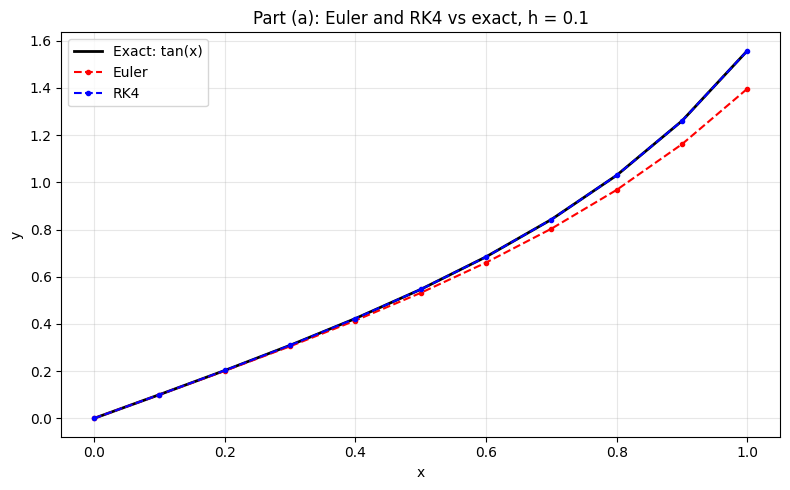

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# map digits and minus to Unicode superscripts
_sup_map = str.maketrans({
    "-": "⁻",
    "0": "⁰",
    "1": "¹",
    "2": "²",
    "3": "³",
    "4": "⁴",
    "5": "⁵",
    "6": "⁶",
    "7": "⁷",
    "8": "⁸",
    "9": "⁹",
})

def sci_sup(x, digits=3):
    """Return string like 3.347×10⁻⁴."""
    if x == 0:
        return f"{0:.{digits}f}×10⁰"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / 10**exp
    exp_str = str(exp).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

# ODE and exact solution
def f(x, y):
    return y**2 + 1

def exact_solution(x):
    return np.tan(x)
def euler(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        ys[n+1] = ys[n] + h * f(xs[n], ys[n])
    return xs, ys

def rk4(f, x0, y0, h, x_end):
    N = int((x_end - x0) / h)
    xs = np.linspace(x0, x_end, N+1)
    ys = np.zeros(N+1)
    ys[0] = y0
    for n in range(N):
        x, y = xs[n], ys[n]
        k1 = f(x, y)
        k2 = f(x + 0.5*h, y + 0.5*h*k1)
        k3 = f(x + 0.5*h, y + 0.5*h*k2)
        k4 = f(x + h,     y + h*k3)
        ys[n+1] = y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    return xs, ys
# ---------- PART (a) ----------
x0, y0 = 0.0, 0.0
x_end_a = 1.0
h_a = 0.1

xs_e, ys_e = euler(f, x0, y0, h_a, x_end_a)
xs_r, ys_r = rk4(f, x0, y0, h_a, x_end_a)
y_exact_a = exact_solution(xs_e)

print("Part (a): Euler vs RK4 vs exact, h = 0.1")
print("x     y_exact      y_Euler      err_Euler        y_RK4        err_RK4")
for i in range(len(xs_e)):
    x_i = xs_e[i]
    ye  = y_exact_a[i]
    yE  = ys_e[i]
    yR  = ys_r[i]
    errE = abs(yE - ye)
    errR = abs(yR - ye)
    print(f"{x_i:4.1f}  {ye:10.6f}  {yE:10.6f}  {sci_sup(errE):>12}  {yR:10.6f}  {sci_sup(errR):>12}")

max_err_E = np.max(np.abs(ys_e - y_exact_a))
max_err_R = np.max(np.abs(ys_r - y_exact_a))

print("\nMax errors on [0,1] with h = 0.1:")
print(f"  Euler max error = {sci_sup(max_err_E)}")
print(f"  RK4   max error = {sci_sup(max_err_R)}")

# optional: see where the PNG will be written
print("Current working directory:", os.getcwd())
# plotting
plt.figure(figsize=(8,5))
plt.plot(xs_e, y_exact_a, 'k-', linewidth=2, label='Exact: tan(x)')
plt.plot(xs_e, ys_e, 'r.--', label='Euler')
plt.plot(xs_r, ys_r, 'b.--', label='RK4')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Part (a): Euler and RK4 vs exact, h = 0.1")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# save THEN show
plt.savefig("part_a_euler_rk4.png", dpi=300)
plt.show()
